In [2]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import CAMB_base as cb

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
#camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
#sys.path.insert(0,camb_path)
import camb
#from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.4 installed at /home/emile/Bureau/stage_M1/CAMB-feature-custom-xe/camb


Binage de la fonction tangente hyperbolique

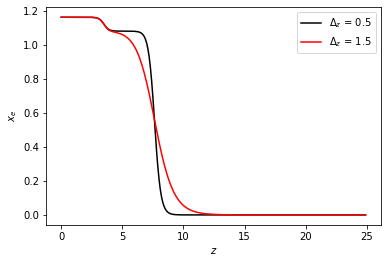

In [3]:
z = np.arange(0, 25, 0.1)
fig, ax = plt.subplots()
ax.plot(z, cb.xe(z,tau=0.054), label=r"$\Delta_z$ = 0.5", c="black")
ax.plot(z, cb.xe(z,dz=1.5), label=r"$\Delta_z$ = 1.5", c="red")
ax.set(ylabel="$x_e$", xlabel="$z$")
plt.savefig('reio_tanh.png')
ax.legend();



In [4]:
z = np.arange(0, 25, 0.1)
xe_resultat = cb.xe(z,tau=0.054)
model = camb.TanhReionization()
model.set_xe(xe_resultat,z)


class: <TanhReionization>
 Reionization = True
 use_optical_depth = False
 use_custom_xe = True
 redshift = 10.0
 optical_depth = 0.0
 delta_redshift = 0.5
 fraction = -1.0
 include_helium_fullreion = True
 helium_redshift = 3.5
 helium_delta_redshift = 0.4
 helium_redshiftstart = 5.5
 tau_solve_accuracy_boost = 1.0
 timestep_boost = 1.0
 max_redshift = 50.0
 num_a = 250
 a = [1.0, 0.9090909090909091, 0.8333333333333334, 0.7692307692307692, 0.7142857142857143, 0.6666666666666666, 0.625, ...]
 xe = [1.1637685599848535, 1.1637685586510091, 1.1637685564518714, 1.1637685528261064, 1.1637685468482313, 1.1637685369923831, 1.1637685207428423, ...]
 

<ipython-input-5-c6740f27cca5>:14: RuntimeWarning: invalid value encountered in true_divide
  ax[0,0].plot(ls,100*np.abs(totCl[debut:,0]-totCl_old[debut:,0])/totCl_old[debut:,0], color='k')
<ipython-input-5-c6740f27cca5>:19: RuntimeWarning: invalid value encountered in true_divide
  ax[1,0].plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1], color='k')
<ipython-input-5-c6740f27cca5>:24: RuntimeWarning: invalid value encountered in true_divide
  ax[1,1].plot(ls,100*np.abs(totCl[debut:,3]-totCl_old[debut:,3])/totCl_old[debut:,3], color='k')
<ipython-input-5-c6740f27cca5>:29: RuntimeWarning: invalid value encountered in true_divide
  ax[0,1].plot(ls,100*np.abs(totCl[debut:,2]-totCl_old[debut:,2])/totCl_old[debut:,2], color='k')


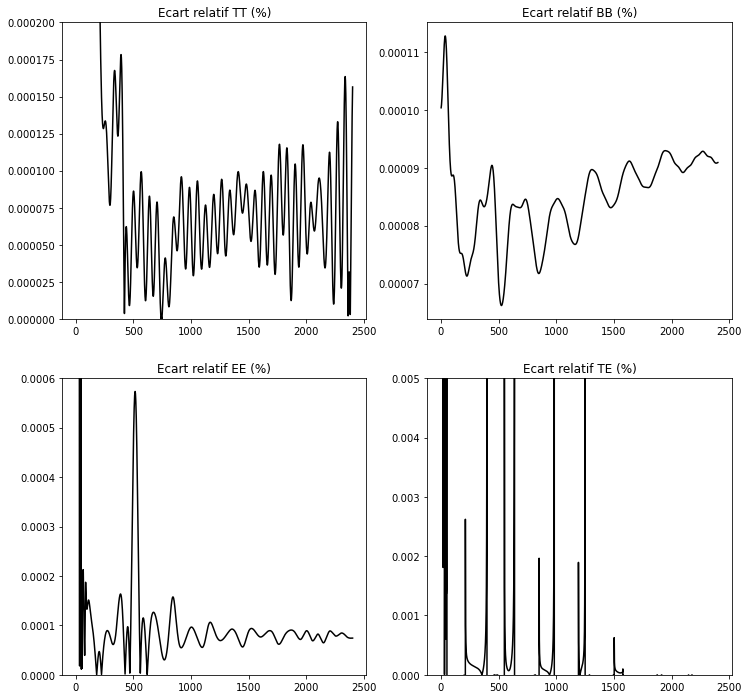

In [5]:
z = np.arange(0, 25, 0.1)
xe_resultat = cb.xe(z,tau=0.054)
model = camb.TanhReionization()
model.set_xe(xe_resultat,z)


totCl_old = cb.cl_from_CAMB(tau=0.054125)   
totCl = cb.cl_from_CAMB(tau = 0,model=model)


debut=0
ls = np.arange(debut,2401,1)
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,100*np.abs(totCl[debut:,0]-totCl_old[debut:,0])/totCl_old[debut:,0], color='k')
#ax[0,0].plot(ls,totCl_old[:,0], color='r',label=r'$\tau$')
ax[0,0].set_title('Ecart relatif TT (%)')
ax[0,0].set_ylim(0,0.0002)
#ax[0,0].legend(fontsize=13)
ax[1,0].plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1], color='k')
#ax[1,0].plot(ls,totCl_old[:,1], color='r',label=r'$\tau$')
ax[1,0].set_title('Ecart relatif EE (%)')
ax[1,0].set_ylim(0,0.0006)
#ax[1,0].legend(fontsize=13)
ax[1,1].plot(ls,100*np.abs(totCl[debut:,3]-totCl_old[debut:,3])/totCl_old[debut:,3], color='k')
#ax[1,1].plot(ls,totCl_old[:,3], color='r',label=r'$\tau$')
ax[1,1].set_title('Ecart relatif TE (%)');
ax[1,1].set_ylim(0,0.005)
#ax[1,1].legend(fontsize=13)
ax[0,1].plot(ls,100*np.abs(totCl[debut:,2]-totCl_old[debut:,2])/totCl_old[debut:,2], color='k')
#ax[0,1].plot(ls,totCl_old[:,2], color='r',label=r'$\tau$')
ax[0,1].set_title('Ecart relatif BB (%)');
#ax[0,1].legend(fontsize=13)


On regarde EE à bas $\ell$

<ipython-input-14-50048830e2f1>:17: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label=zre[i])
<ipython-input-14-50048830e2f1>:17: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label=zre[i])
<ipython-input-14-50048830e2f1>:17: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label=zre[i])
<ipython-input-14-50048830e2f1>:17: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label=zre[i])
<ipython-input-14-50048830e2f1>:17: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label=zre[i])


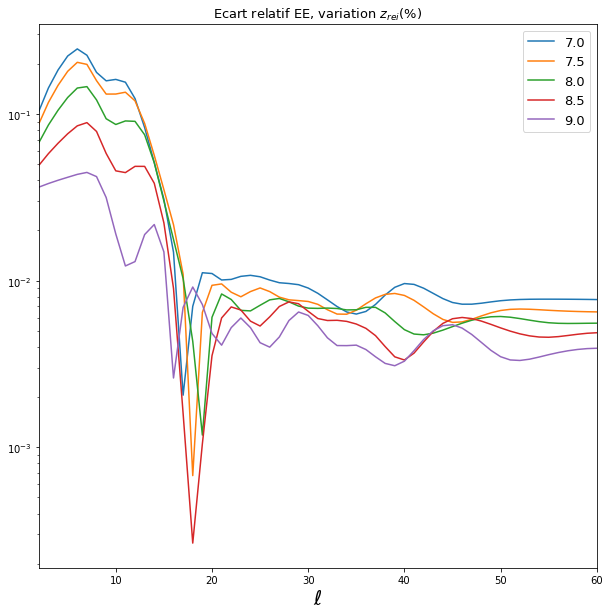

In [14]:
#cmb_params = {'omch2': 0.120, 'ombh2': 0.0224,'H0': 67.4,'As': 10**-10*np.exp(3.047),'ns': 0.965,'tau': 0.054}



figure = plt.figure(figsize=(10,10))
zre = np.arange(7,9.5,0.5)
z = np.arange(0, 25, 0.1)
for i in range(5):
  
    xe_resultat = cb.xe(z,zre = zre[i])
    model = camb.TanhReionization()
    model.set_xe(xe_resultat,z,smooth=0)
    model2 = camb.TanhReionization(use_optical_depth=False,redshift=zre[i]+0.0095)
    totCl = cb.cl_from_CAMB(0,model=model)
    totCl_old = cb.cl_from_CAMB(0,model=model2)
    
    plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label=zre[i])
    plt.title('Ecart relatif EE, variation $z_{rei}$(%) ',fontsize=13)
    plt.xlim(2,60)
    plt.yscale('log')
    #plt.ylim(0,0.1)
    plt.xlabel('$\ell$',fontsize=20)
    plt.legend(fontsize=13)
plt.show()




<ipython-input-13-95ee5766950c>:15: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])
<ipython-input-13-95ee5766950c>:15: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])
<ipython-input-13-95ee5766950c>:15: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])
<ipython-input-13-95ee5766950c>:15: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])
<ipython-input-13-95ee5766950c>:15: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])


<Figure size 720x720 with 0 Axes>

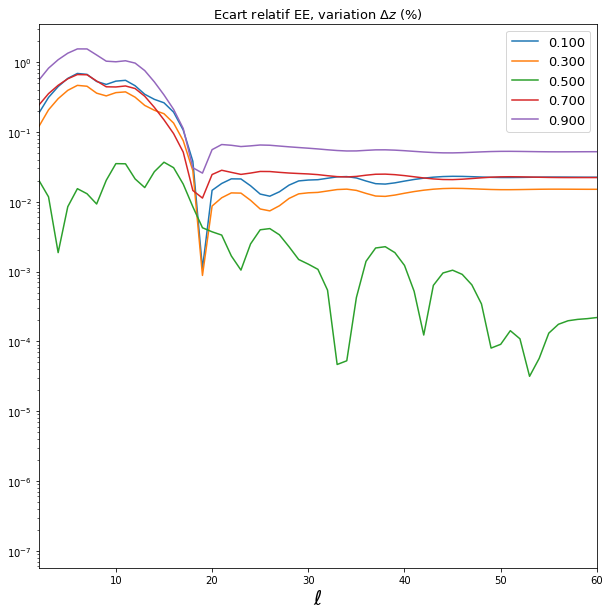

In [13]:
figure = plt.figure(figsize=(10,10))
delta_z = np.arange(0.1,1.5,0.2)
z = np.arange(0, 25, 0.1)


figure = plt.figure(figsize=(10,10))
for i in range(5):
    xe_resultat = cb.xe(z,tau=0.054,dz=delta_z[i])
    model = camb.TanhReionization()
    model.set_xe(xe_resultat,z,smooth=0)
    model2 = camb.TanhReionization(use_optical_depth=True,optical_depth=0.05412535,delta_redshift=delta_z[i])
    totCl = cb.cl_from_CAMB(0,model=model)
    totCl_old = cb.cl_from_CAMB(0,model=model2)
    
    plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])
    plt.title('Ecart relatif EE, variation $\Delta z$ (%)',fontsize=13)
    plt.xlim(2,60)
    plt.yscale('log')
    plt.xlabel('$\ell$',fontsize=20)
    #plt.ylim(0,0.1)
    plt.legend(fontsize=13)
plt.show()

In [20]:
#paramètres Litebird
sT = 2.8 * (np.pi/60./180.)*10**(-6)
sP = sT * np.sqrt(2.)
theta_FWHM =80 * (np.pi/60./180.)
#paramètres Planck
"""
sT = 33 * (np.pi/60./180.)*10**(-6)
sP = sT * np.sqrt(2.)
theta_FWHM =7. * (np.pi/60./180.)
"""



'\nsT = 33 * (np.pi/60./180.)*10**(-6)\nsP = sT * np.sqrt(2.)\ntheta_FWHM =7. * (np.pi/60./180.)\n'

In [7]:


def noise(s,l):
    return s**2*np.exp(l*(l+1)*theta_FWHM**2/(8*np.log(2)))



In [17]:
cmb_params = {'omch2': 0.120, 'ombh2': 0.0224,'H0': 67.4,'As': 10**-10*np.exp(3.047),'ns': 0.965}

camb_params = camb.set_params(**cmb_params)
tau = 0.054
zr = camb.get_zre_from_tau(camb_params, tau)
print(zr)

7.6431286728119385


In [ ]:
eigenvalue = np.linalg.eig(a)
nombre = np.shape(eigenvalue)[0]

plt.plot(nombre,-np.sort(-eigenvalue))
plt.xlabel('Numero valeur propre',fontsize=13)
plt.ylabel('Valeur propre',fontsize=13)

In [10]:
print(0.2453/(3.9715*(1-0.2453)))

0.08184056733496069


In [16]:
a=0.054125-0.054
print(100*a/0.054)

0.23148148148148168
